## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 9.9: CO and HCN emission toward the Galactic center 

#### the observations were taken with the Atacama Submillimeter Telescope Experiment (ASTE) and available at https://www.nro.nao.ac.jp/~nro45mrt/html/results/data.html
#### I have manually integrated the data cubes to reduce size for github

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from astropy.io import fits
%matplotlib inline

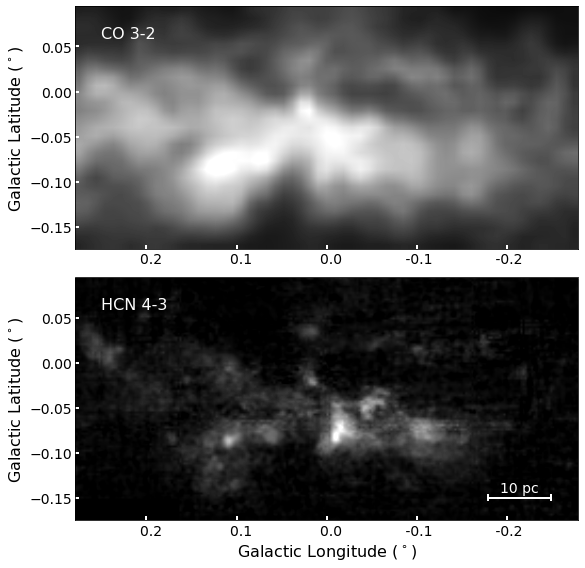

In [8]:
fig = plt.figure(figsize=(8, 8))

# I manually integrated and cropped the large data cubes to a small region around the Galactic center
# the resulting range in (l,b) is
extent = [0.27861133411109995, -0.27861086188890005, -0.174722214, 0.09444443999999999]

# read in and plot CO
hdu = fits.open('galactic_center_CO32.fits')
co = hdu[0].data
hdu.close()
ax1 = fig.add_subplot(211)
ax1.imshow(co, cmap='gray', origin='lower', vmin=0.0*co.max(), vmax=0.9*co.max(), extent=extent, interpolation='bilinear')
ax1.tick_params(direction='in', length=4, width=2, colors='white', labelcolor='black', labelsize=14)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%5.1f'))
ax1.set_xlim(extent[0], extent[1])
ax1.set_ylim(extent[2], extent[3])
#ax1.set_xlabel(r'Galactic Longitude ($^\circ$)')
ax1.set_ylabel(r'Galactic Latitude ($^\circ$)', fontsize=16)
ax1.text(0.05,0.87,r'CO 3-2', {'color': 'white', 'fontsize': 16}, transform=ax1.transAxes)

# read in and plot HCN
hdu = fits.open('galactic_center_HCN43.fits')
hcn = hdu[0].data
hdu.close()
ax2 = fig.add_subplot(212)
ax2.imshow(hcn, cmap='gray', origin='lower', vmin=0.0*hcn.max(), vmax=0.9*hcn.max(), extent=extent, interpolation='bilinear')
ax2.tick_params(direction='in', length=4, width=2, colors='white', labelcolor='black', labelsize=14)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%5.1f'))
ax2.set_xlim(extent[0], extent[1])
ax2.set_ylim(extent[2], extent[3])
ax2.set_xlabel(r'Galactic Longitude ($^\circ$)', fontsize=16)
ax2.set_ylabel(r'Galactic Latitude ($^\circ$)', fontsize=16)
ax2.text(0.05,0.87,r'HCN 4-3', {'color': 'white', 'fontsize': 16}, transform=ax2.transAxes)

# 10 pc = 0.07 deg at 8.2 kpc
xbar1 = extent[1] + 0.03
xbar2 = xbar1 + 0.07
ybar = extent[2] + 0.025
ax2.plot([xbar1,xbar2], [ybar, ybar], lw=2, color='white')
ax2.plot([xbar1,xbar1], [ybar-0.003, ybar+0.003], lw=2, color='white')
ax2.plot([xbar2,xbar2], [ybar-0.003, ybar+0.003], lw=2, color='white')
ax2.text(0.5*(xbar1+xbar2), ybar+0.006, '10 pc', ha='center', color='white', fontsize=14)

plt.tight_layout()
plt.savefig('galactic_center_molecules.pdf')